In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_size = 10000
raw_data = pd.read_csv(f"../data/raw_data/raw_data_{data_size}.csv")

/tmp/ipykernel_29942/387469093.py:2: DtypeWarning: Columns (144) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(f"../data/raw_data/raw_data_{data_size}.csv")


In [4]:
# Exemplo de manipulação de colunas
raw_data.rename(
    columns={
        "listing.pricingInfo.rawPrice": "price",
        "link.data.city": "city",
        "link.data.state": "state",
        "link.data.neighborhood": "neighborhood",
        "listing.usableAreas": "usable_areas",
        "listing.totalAreas": "total_areas",
        "listing.parkingSpaces": "parking_spaces",
        "listing.suites": "suites",
        "listing.bathrooms": "bathrooms",
        "listing.bedrooms": "bedrooms",
    },
    inplace=True,
)

In [5]:
cols_to_select = [
    "price",
    "city",
    "state",
    "neighborhood",
    "usable_areas",
    "total_areas",
    "parking_spaces",
    "suites",
    "bathrooms",
    "bedrooms",
]
numeric_cols = [
    "price",
    "usable_areas",
    "total_areas",
    "parking_spaces",
    "suites",
    "bathrooms",
    "bedrooms",
]

In [6]:
data = raw_data[cols_to_select]

In [7]:
data.shape

(10000, 10)

### Check for missing values 

In [8]:
data.nunique()

price             1127
city               453
state               25
neighborhood      3502
usable_areas       585
total_areas        800
parking_spaces      19
suites              12
bathrooms           14
bedrooms            14
dtype: int64

In [9]:
data = data.dropna()

In [10]:
len(data)

8130

In [11]:
for col in numeric_cols:
    data[col] = data[col].astype(int)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'usable_areas'}>,
        <Axes: title={'center': 'total_areas'}>],
       [<Axes: title={'center': 'parking_spaces'}>,
        <Axes: title={'center': 'suites'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'bedrooms'}>, <Axes: >, <Axes: >]],
      dtype=object)

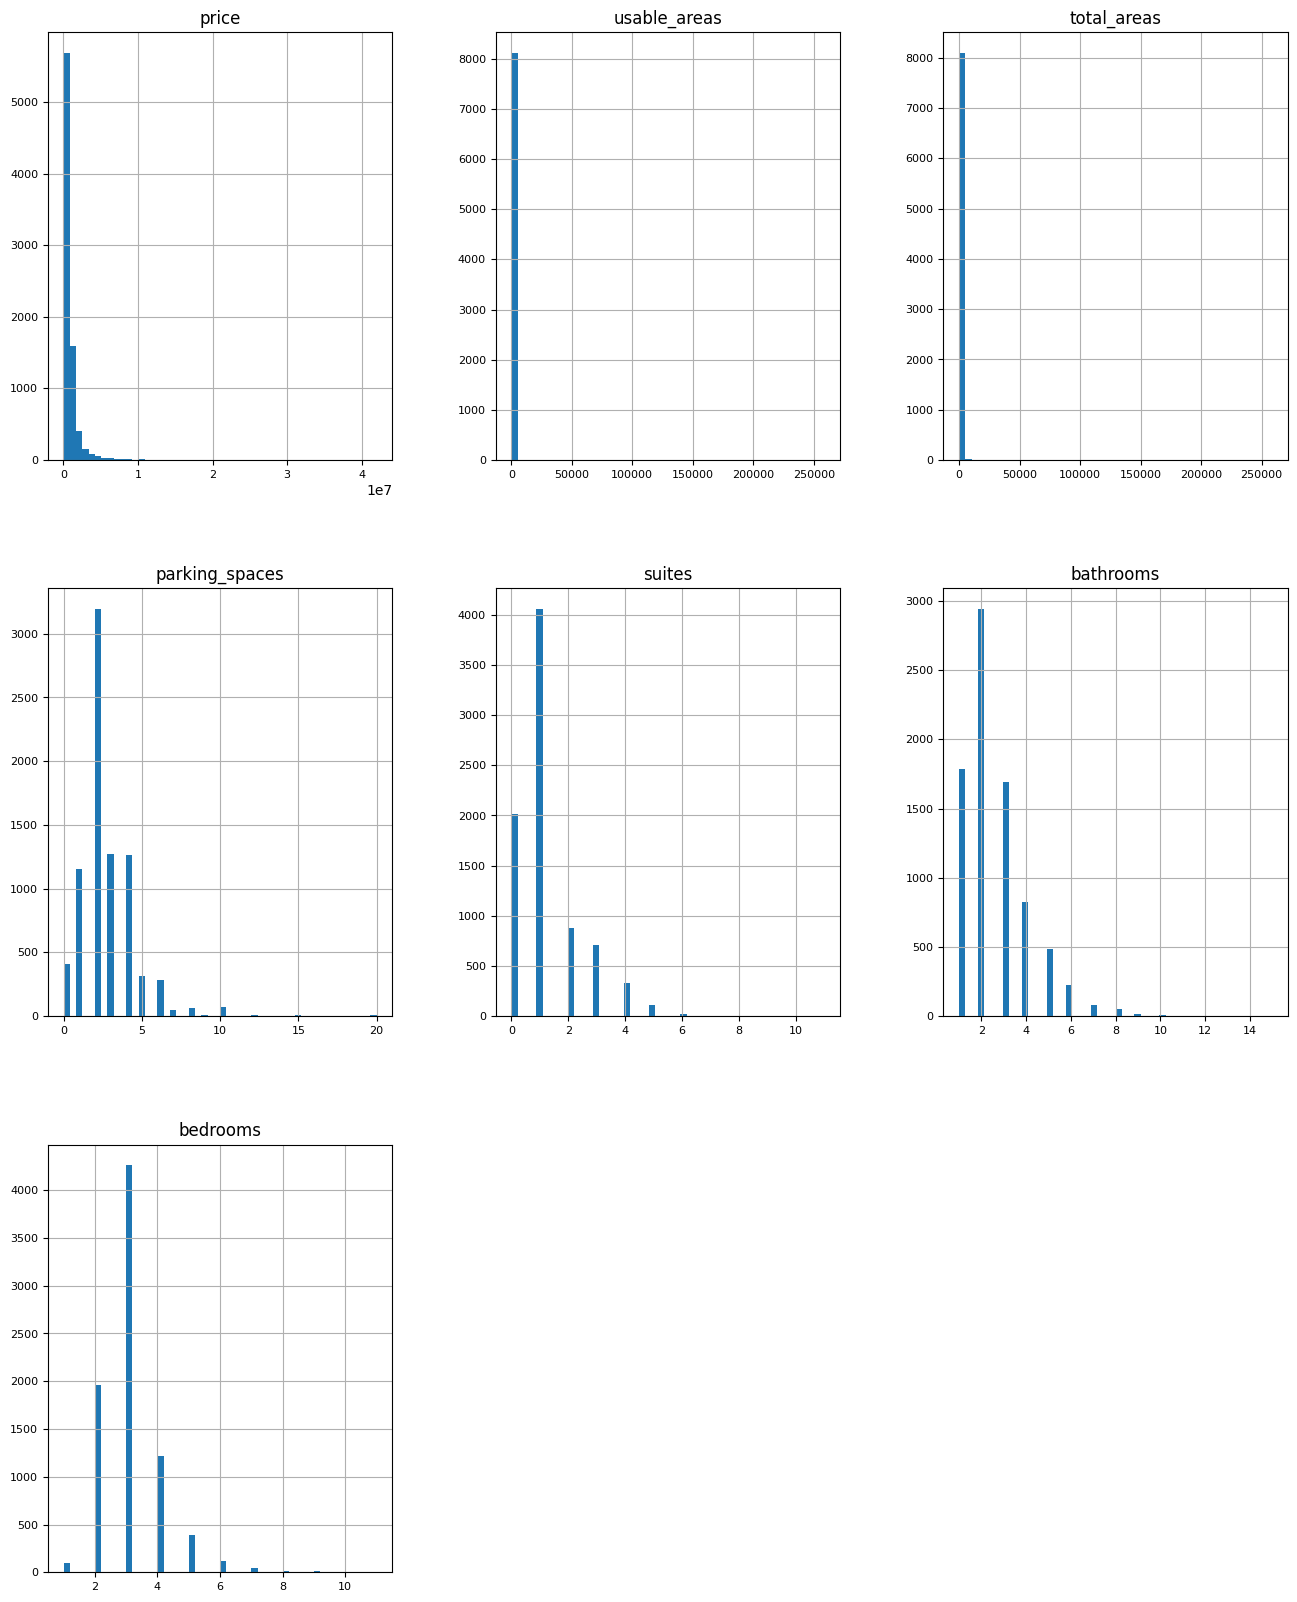

In [12]:
data[numeric_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# Visualização dos histogramas no permite concluir que há grandes outliers nas
# variáveis price, usable_areas, total_areas

### Visualize Outliers

<img src="../images/0_Zz3XmuErUXmIcy6C.webp" alt="Some Text" width="400" height="250">

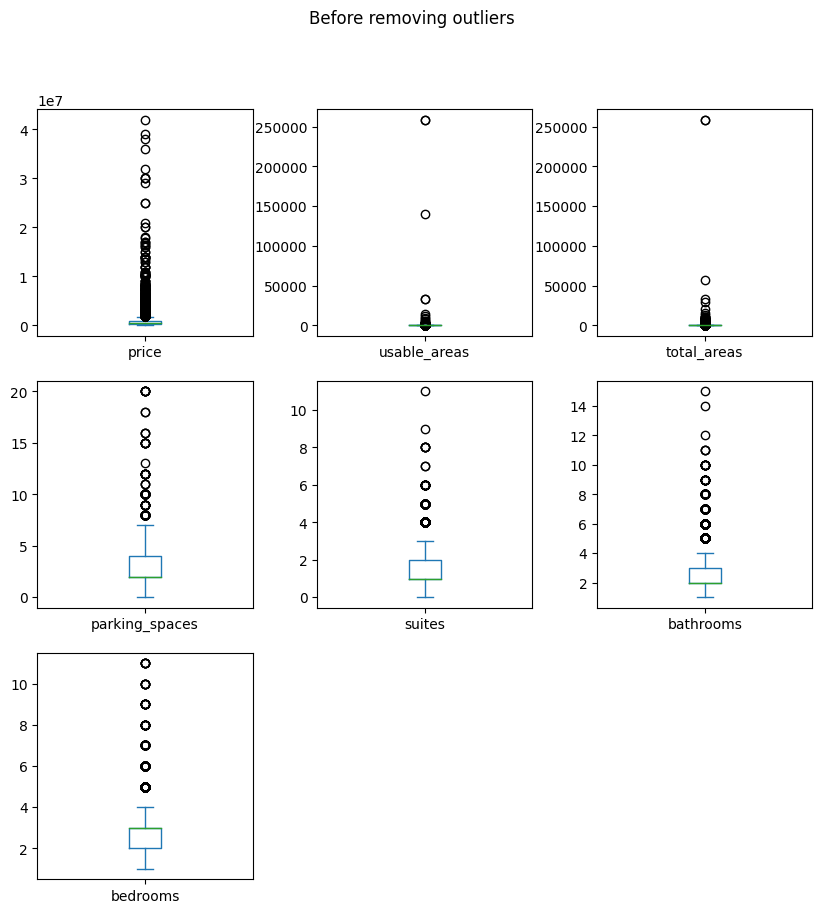

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
fig.subplots_adjust(wspace=0.3)
fig.suptitle("Before removing outliers")
for i, col in enumerate(numeric_cols):
    if data[col].dtype != "object":
        data[col].plot(kind="box", ax=axes[i // 3, i % 3])
axes[2, 2].set_visible(False)
axes[2, 1].set_visible(False)

In [14]:
# Specify the columns to remove outliers from
cols_to_clean = [
    "price",
    "usable_areas",
    "total_areas",
]

# Define the lower and upper bounds for filtering outliers
quantiles = data[cols_to_clean].quantile([0.05, 0.95])
lower_bound = quantiles.loc[0.05]
upper_bound = quantiles.loc[0.95]

# Filter out the outliers from each specified column
for col in cols_to_clean:
    data = data[(data[col] > lower_bound[col]) & (data[col] < upper_bound[col])]

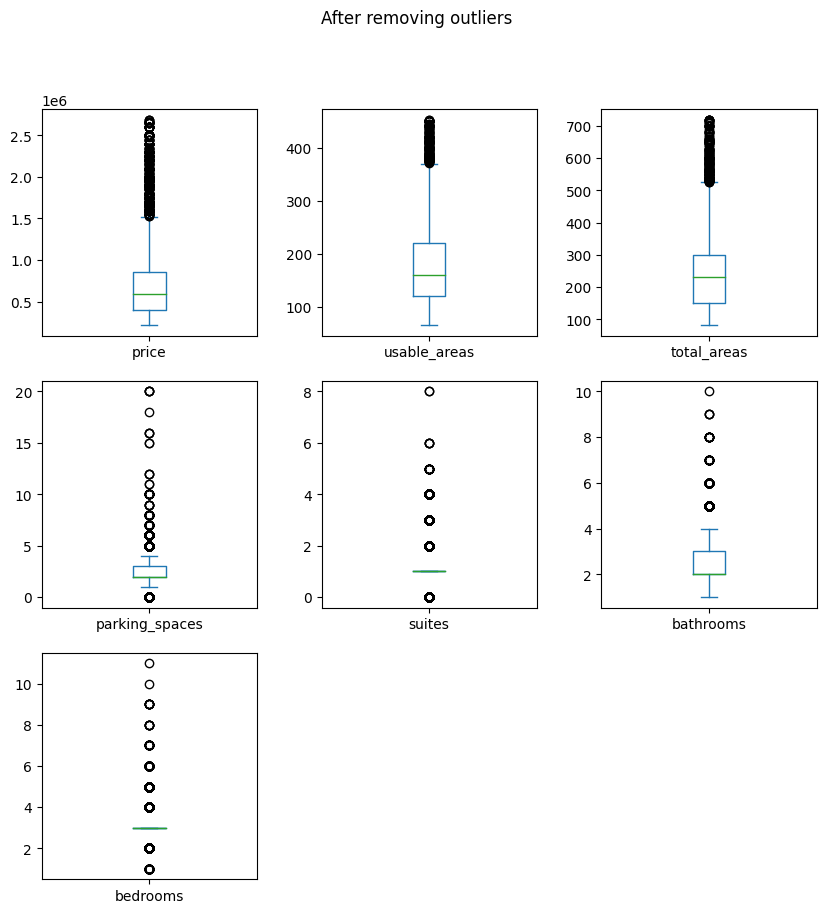

In [15]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
fig.subplots_adjust(wspace=0.3)

fig.suptitle("After removing outliers")

for i, col in enumerate(numeric_cols):
    if data[col].dtype != "object":
        data[col].plot(kind="box", ax=axes[i // 3, i % 3])
axes[2, 2].set_visible(False)
axes[2, 1].set_visible(False)

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# create a StandardScaler object
scaler = StandardScaler()

# create a MinMaxScaler object
minmax_scaler = MinMaxScaler()

# select the columns to normalize/standardize
cols_to_standardize = [
    "usable_areas",
    "total_areas",
]
# cols_to_standardize = ["price"]
_data = data.copy()
# normalize the selected columns
_data[cols_to_standardize] = minmax_scaler.fit_transform(data[cols_to_standardize])

# # standardize the selected columns
# data[cols_to_standardize] = scaler.fit_transform(data[cols_to_standardize])

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'usable_areas'}>,
        <Axes: title={'center': 'total_areas'}>],
       [<Axes: title={'center': 'parking_spaces'}>,
        <Axes: title={'center': 'suites'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'bedrooms'}>, <Axes: >, <Axes: >]],
      dtype=object)

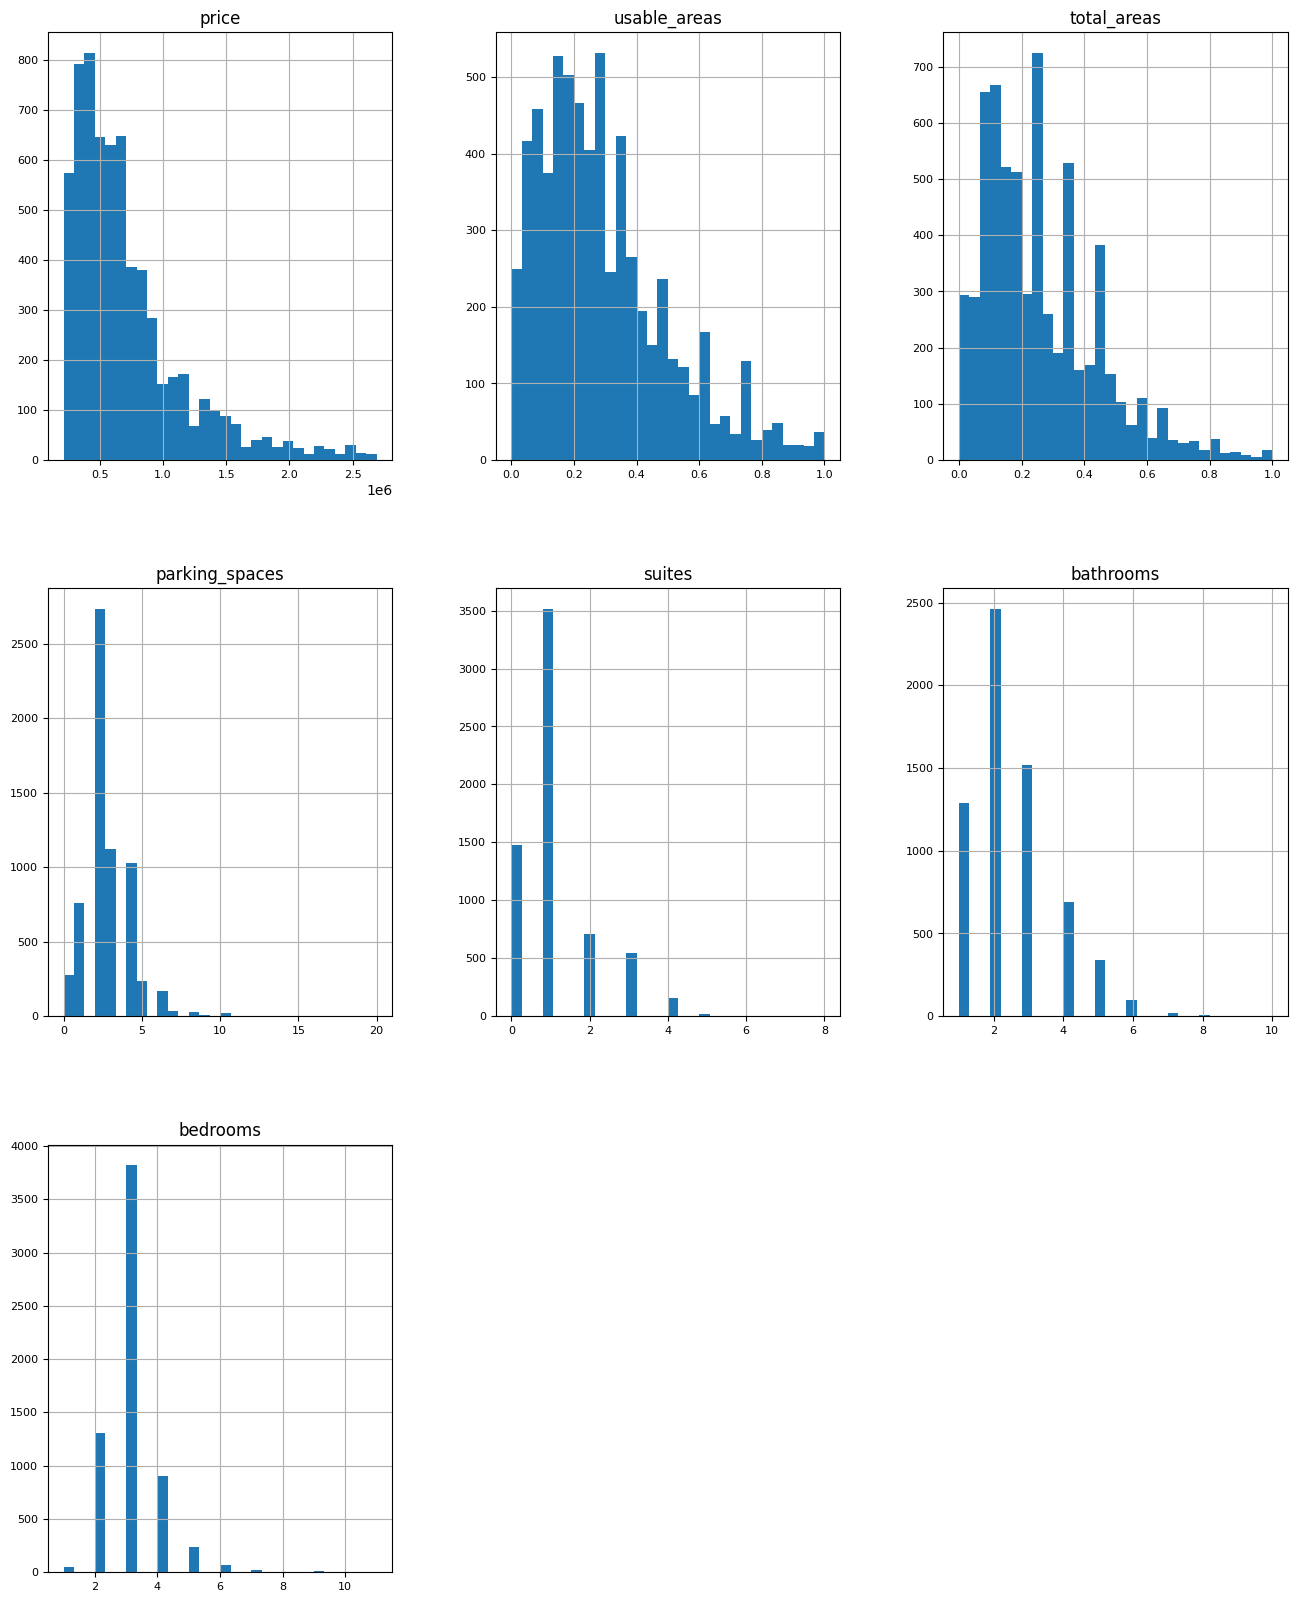

In [17]:
_data[numeric_cols].hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8)

In [18]:
data[numeric_cols]

,price,usable_areas,total_areas,parking_spaces,suites,bathrooms,bedrooms
0,850000,320,320,4,0,3,4
1,680000,140,150,2,1,3,3
2,590000,120,254,2,1,2,3
4,300000,400,400,4,4,5,4
5,380000,140,140,3,1,2,3
...,...,...,...,...,...,...,...
9985,1280000,191,319,2,3,2,3
9986,269874,75,125,2,1,2,2
9987,470000,141,320,5,3,3,3
9989,660000,185,185,2,3,1,3


<Axes: >

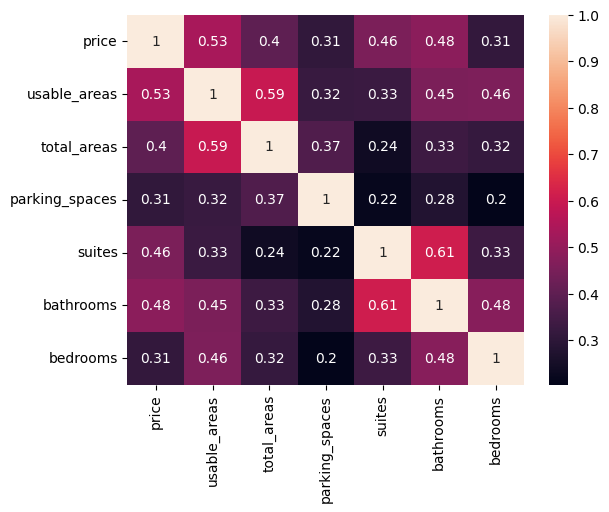

In [19]:
import seaborn as sns

sns.heatmap(data[numeric_cols].corr(), annot=True)

### Visualize Normal distribution

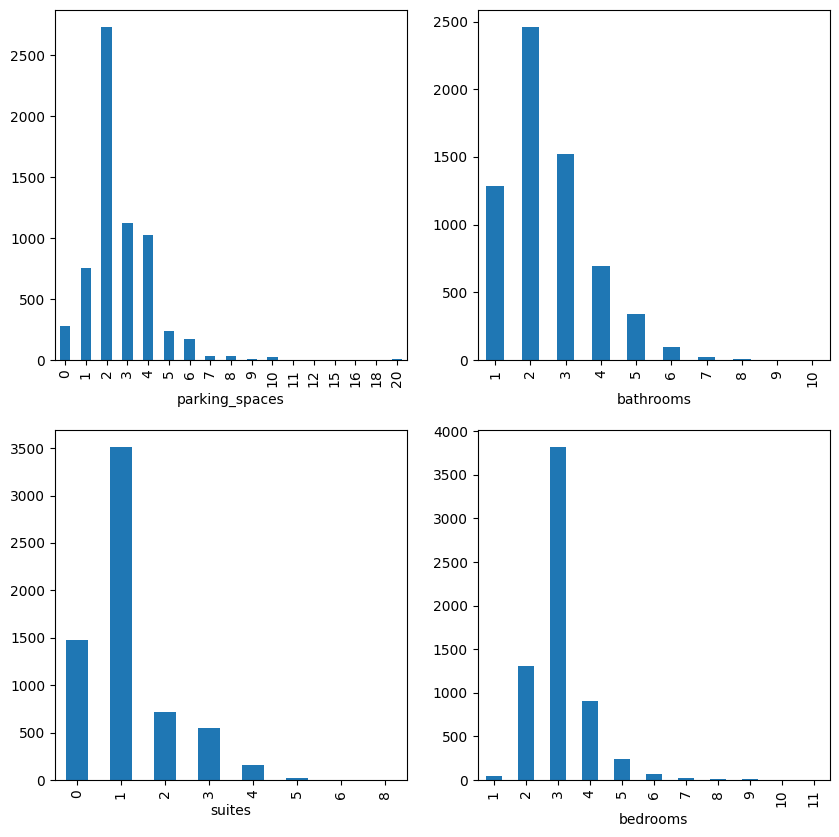

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
cols_to_plot = [
    "parking_spaces",
    "suites",
    "bathrooms",
    "bedrooms",
]
for i, col in enumerate(cols_to_plot):
    counts = data[col].value_counts().sort_index()
    counts.plot(kind="bar", ax=axes[i % 2, i // 2])
plt.show()

In [21]:
data["price_per_m2"] = data["price"] / data["usable_areas"]

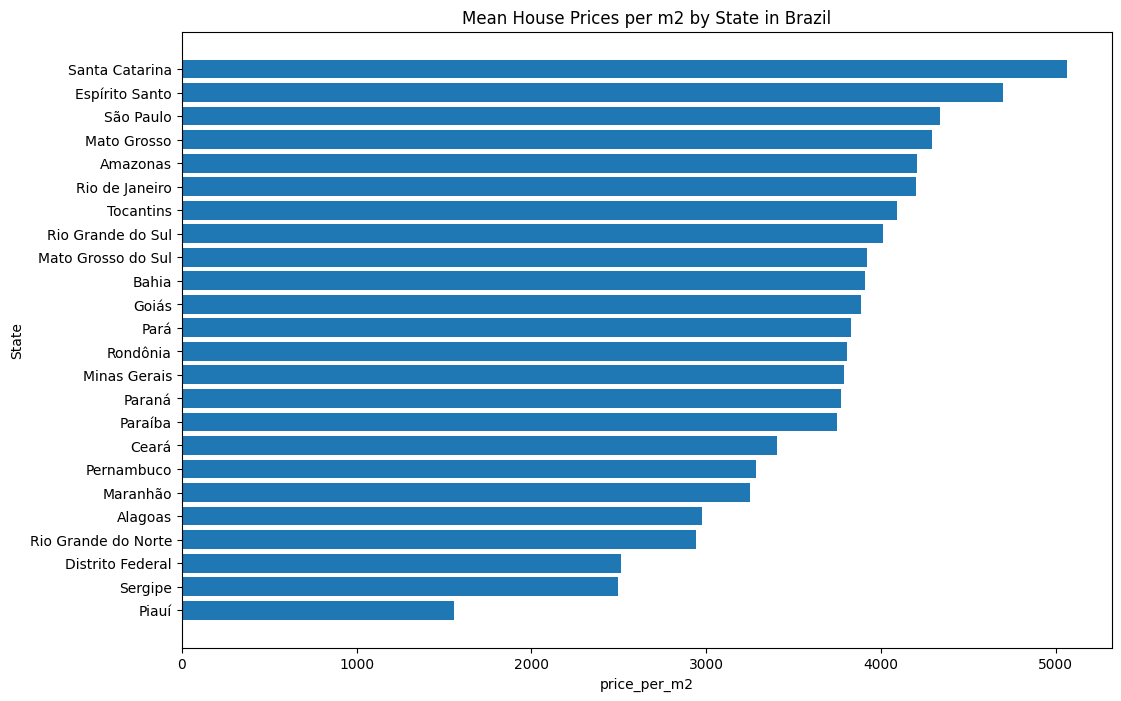

In [22]:
import matplotlib.pyplot as plt

# Group by state and get average price for each state
grouped = data.groupby("state")["price_per_m2"].mean().reset_index()

# Sort by price in ascending order to get the cheapest states
sorted_grouped = grouped.sort_values(by="price_per_m2", ascending=True)

# Create a bar chart for the mean house prices by state
plt.figure(figsize=(12, 8))
plt.barh(sorted_grouped["state"], sorted_grouped["price_per_m2"])
plt.xlabel("price_per_m2")
plt.ylabel("State")
plt.title("Mean House Prices per m2 by State in Brazil")
plt.show()

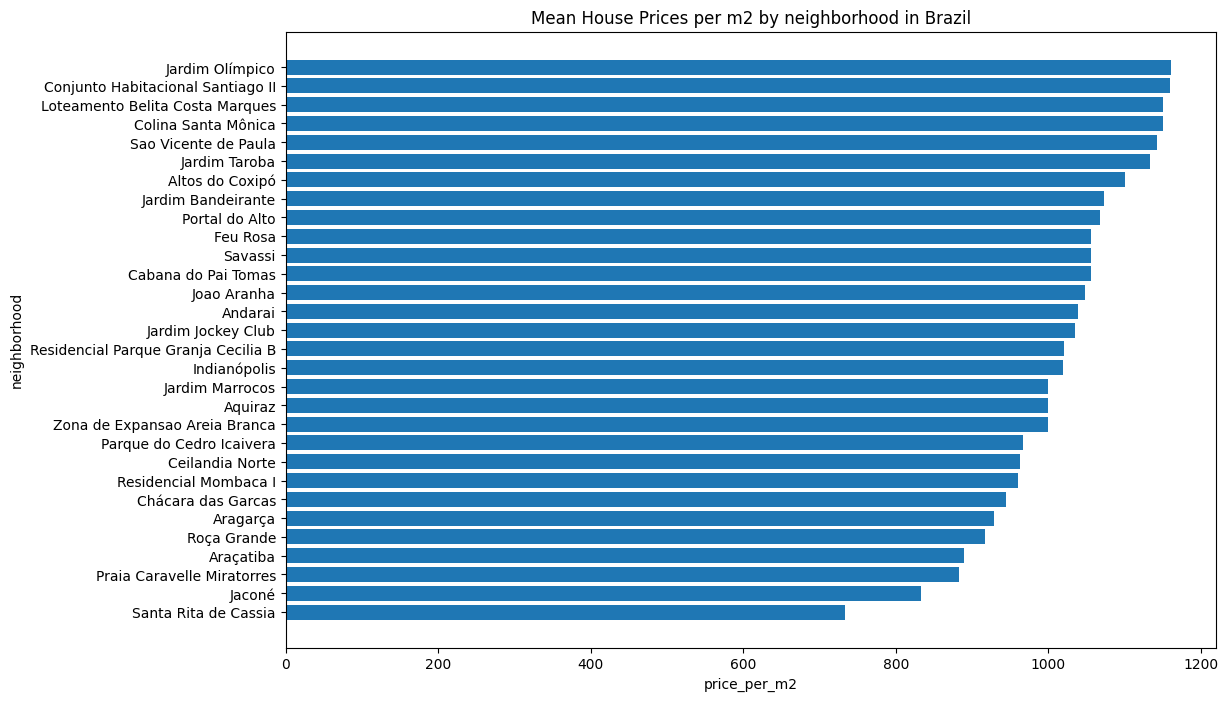

In [23]:
import matplotlib.pyplot as plt

# Group by state and get average price for each state
grouped = data.groupby("neighborhood")["price_per_m2"].mean().reset_index()

# Sort by price in ascending order to get the cheapest states
sorted_grouped = grouped.sort_values(by="price_per_m2", ascending=True).head(30)

# Create a bar chart for the mean house prices by state
plt.figure(figsize=(12, 8))
plt.barh(sorted_grouped["neighborhood"], sorted_grouped["price_per_m2"])
plt.xlabel("price_per_m2")
plt.ylabel("neighborhood")
plt.title("Mean House Prices per m2 by neighborhood in Brazil")
plt.show()

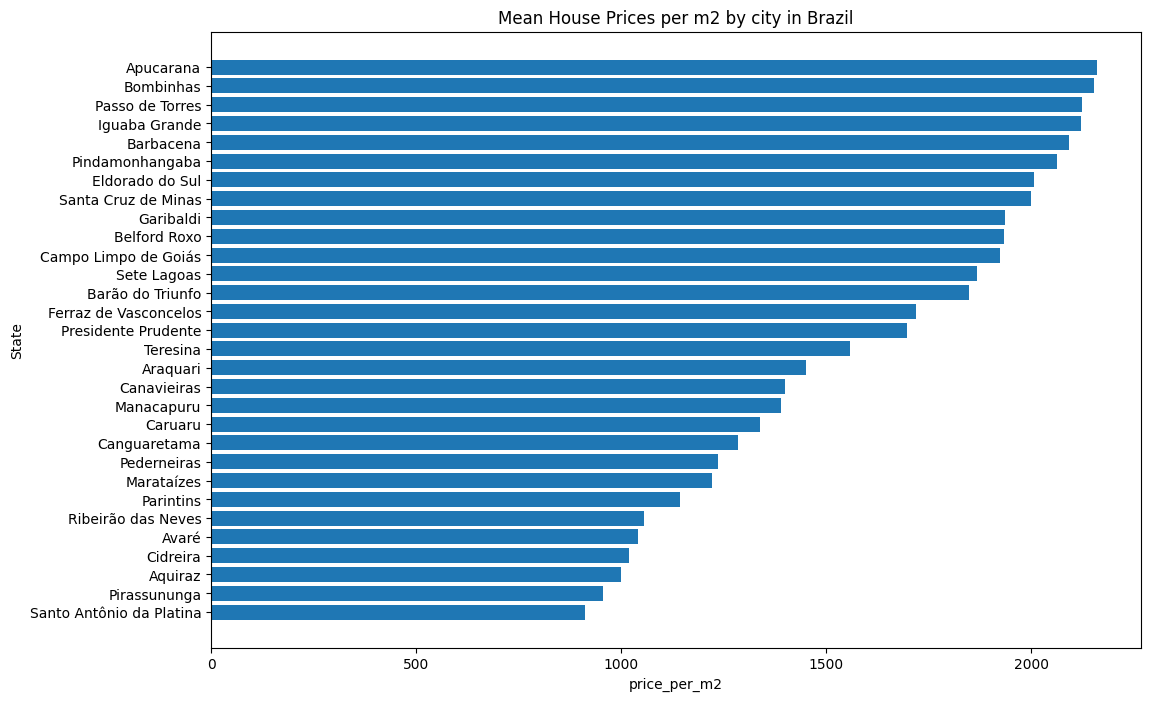

In [32]:
import matplotlib.pyplot as plt

# Group by state and get average price for each state
grouped = data.groupby("city")["price_per_m2"].mean().reset_index()

# Sort by price in ascending order to get the cheapest states
sorted_grouped = grouped.sort_values(by="price_per_m2", ascending=True).head(30)

# Create a bar chart for the mean house prices by state
plt.figure(figsize=(12, 8))
plt.barh(sorted_grouped["city"], sorted_grouped["price_per_m2"])
plt.xlabel("price_per_m2")
plt.ylabel("State")
plt.title("Mean House Prices per m2 by city in Brazil")
plt.show()

In [25]:
data["city"].unique()

array(['Rio de Janeiro', 'São Paulo', 'Campo Grande', 'Piracicaba',
       'São José dos Campos', 'Salto', 'Florianópolis', 'Lagoa Santa',
       'Itanhaém', 'Jacareí', 'Santo Antônio da Platina', 'Taubaté',
       'Mongaguá', 'Jacutinga', 'Anápolis', 'São Bernardo do Campo',
       'Franca', 'São José do Rio Preto', 'Rio das Ostras',
       'Senador Canedo', 'Londrina', 'São Luís', 'Campinas',
       'Itaquaquecetuba', 'Bauru', 'Aracaju', 'Ribeirão Preto', 'Serra',
       'Aparecida de Goiânia', 'Manaus', 'Campo Limpo de Goiás',
       'Apucarana', 'Praia Grande', 'Brasília', 'Goiânia', 'Parintins',
       'Uruguaiana', 'Santo André', 'Pontal do Paraná', 'Sorocaba',
       'Caçapava', 'Cachoeirinha', 'Caraguatatuba', 'Jarinu', 'Cotia',
       'Porto Alegre', 'Hortolândia', 'Guarulhos', 'Americana',
       'Joinville', 'Uberlândia', 'Cabo Frio', 'Palmas',
       'São Pedro da Aldeia', 'Fortaleza', 'Lauro de Freitas', 'Tremembé',
       'Leme', 'Cuiabá', 'Camaçari', 'Suzano', 'Mogi das 

#### 2D PCA 

In [26]:
from sklearn.decomposition import PCA

# Definir o número de componentes desejado
n_components = 2

# Aplicar o PCA
pca = PCA(n_components=n_components)
_data = data.drop(["price", "city", "state", "price_per_m2", "neighborhood"], axis=1)
pca_data = pca.fit_transform(_data)

In [27]:
pca_dataframe = pd.DataFrame(pca_data, columns=["pca1", "pca2"])
pca_dataframe["price"] = data["price"]

In [28]:
import plotly.express as px


# Create your plot
fig = px.scatter(pca_dataframe.head(100), x="pca1", y="pca2", color="price")
fig.show()

##### 3D PCA 

In [29]:
from sklearn.decomposition import PCA

# Definir o número de componentes desejado
n_components = 3

# Aplicar o PCA
pca = PCA(n_components=n_components)
_data = data.drop(
    ["price", "city", "state", "price_per_m2", "usable_areas", "neighborhood"], axis=1
)
pca_data = pca.fit_transform(_data)

In [30]:
pca_dataframe = pd.DataFrame(pca_data, columns=["pc1", "pc2", "pc3"])
pca_dataframe["price"] = data["price"]

In [31]:
# Create your plot
fig = px.scatter_3d(pca_dataframe.head(100), x="pc1", y="pc2", z="pc3", color="price")
fig.show()